#Filter Method

more detail about filter methon can accesed on

[Filter Method journal](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.96.033302#:~:text=The%20paper%20presents%20a%20method%20for%20simultaneous%20computation,packet%20at%20the%20rate%20comparable%20to%20%CE%B4%20function.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Metode filter

# Matriks tridiagonal
def tridag(a,b,c,u,n,ng):
    temp=b[0]
    u[0]=u[0]/temp
    for j in range(1,n):
        temp1 = b[j]
        b[j]  = c/temp
        temp  = temp1-a*b[j]
        u[j]  = (u[j]-a*u[j-1])/temp
    for j in range (n-2,-1,-1):
        u[j]  = u[j]-b[j+1]*u[j+1]
    return u

# rumus filter untuk potensial 1 dimensi
def filter1D(dx,vpot,psi,energy,n,k):
    dx2 = dx*dx
    a = -0.5/dx2
    c = a
    odx2 = 1/dx2
    b=np.zeros(n)
    #k adalah jumlah perulangan filter
    for k in range(0,5):
        for i in range(0,n):
            b[i] = (odx2+vpot[i]-energy)
        global tridag
        psi = tridag(a,b,c,psi,n,n)
    fnorm = sum(psi*psi)*dx
    psi = psi / (fnorm**0.5)
    return psi

# rumusan hamiltonian
def hamiltonian(dx,vpot,psi,ng):
    dx2 = dx*dx
    a =-0.5/dx2
    c = a
    odx = 1/dx2
    u = np.zeros(ng)
    u[0] =((odx+vpot[0])*psi[0] + c*psi[1])
    for i in range (1,ng-1):
        u[i] = (a*psi[i-1]+(odx+vpot[i])*psi[i]+c*psi[i+1])
    u[-1]=((a*psi[-2])+(odx+vpot[-1])*psi[-1])
    psiu = psi*u
    energy_new = sum(psiu)*dx
    return energy_new

# Rumusan eigenstate
def eigenState(x, ngrid, vpot, initE, dx):
    if initE <= 0:
        initE = initE + 1e-12

    x_start = x[0]
    x_end = x[ngrid - 1]
    psi = np.zeros(ngrid)
    if x_start < 0:
        for i in range(0, ngrid):
            psi[i] = (np.sin(x[i]) + np.cos(x[i]))
    else:
        for i in range(0, ngrid):
            psi[i] = 1 + x[i] / x_end

    energy = initE
    error = 1e3
    loop = 5
    vharm = vpot[ngrid - 1]
    
    while error > 1e-12:
        num_iterations = 10 if loop == 1 else 10  # Modify the number of iterations here if needed
        psi = filter1D(dx, vpot, psi, energy, ngrid, num_iterations)
        energy_new = hamiltonian(dx, vpot, psi, ngrid)
        error = abs(energy_new - energy) / energy
        energy = energy_new
        loop += 1

    rsign = 1
    ampl_max = 1

    if vharm <= 1:
        if initE > 0:
            ampl_max = 0
            inode = 0
            wb = psi[ngrid - 1]
            i = ngrid
            while inode < 10:
                i -= 1
                wf = psi[i]
                if i < 10:
                    break
                if wf * wb < 0:
                    inode += 1
                abswf = abs(wf)
                if abswf > ampl_max:
                    ampl_max = abswf
                wb = wf

    output = [energy_new, psi]
    return output

#Example for a Single Harmonic Potensial

##Input potensial

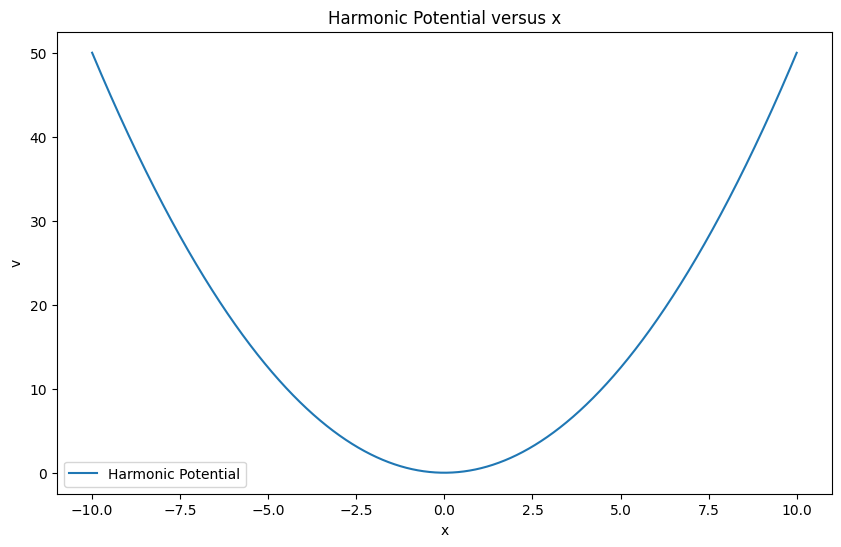

In [2]:
# Import the required library
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the harmonic potential
xmin = -10 # Lower bound of the x domain
xmax = 10 # Upper bound of the x domain
dx = 0.001 # Distance between x grids
k = 1 # Spring constant or Omega
v0 = 0 # Potential value at zero point
leb = xmax-xmin # Length of the x domain
ngrid = int(leb/dx) # Number of x grids

# Create arrays for x coordinates and v potential
x = np.zeros(ngrid)
v = np.zeros(ngrid)

# Define a function to calculate the harmonic potential
def potensial_harmonik(x, k, v0):
  # x is an array of x coordinates
  # k is the spring constant
  # v0 is the potential value at zero point
  # This function returns an array of v potential that corresponds to x, k, and v0
  v = 0.5 * k * x ** 2 + v0 # Formula for harmonic potential
  return v

# Calculate the harmonic potential for each x value
for i in range(0,ngrid):
  x[i] = xmin + (i * dx) # The i-th x coordinate
  v[i] = potensial_harmonik(x[i], k, v0) # The i-th v potential

# Plot the harmonic potential versus x
plt.figure(figsize=(10,6)) # Create a figure with size 10x6 inches
plt.plot(x,v, label='Harmonic Potential') # Plot a line with label Harmonic Potential
plt.xlabel('x') # Label the x axis
plt.ylabel('v') # Label the y axis
plt.title('Harmonic Potential versus x') # Give a title to the plot
plt.legend() # Show the plot legend
plt.show() # Show the plot


##Show eigen function and eigen energy


1.   plot wave function
2.   plot Probability
3.   energy eigen value
4.   energy level (calculate from peaks)

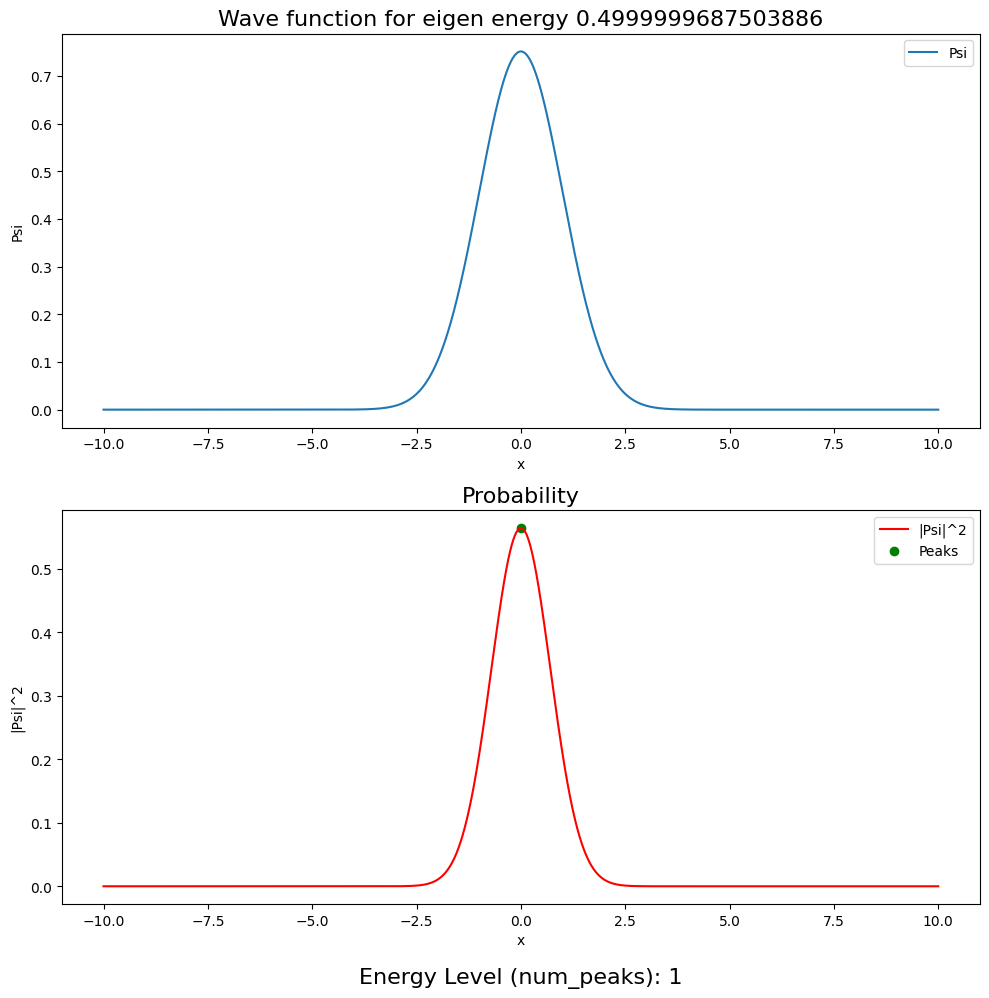

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming eigenState is a function that calculates the eigenstate energy
# and x, ngrid, v, dx are defined before this code.
# change initE to show different energy levels (initE = 0 is for energy level 1)

initE = 0

output = eigenState(x, ngrid, v, initE, dx)
energy = output[0]
psi = output[1]

# Calculate the square of the wave function (psi squared)
psi_squared = np.abs(psi) ** 2

# Plot the psi versus x
plt.figure(figsize=(10, 10))  # Create a figure with size 10x6 inches

# Plot psi
plt.subplot(2, 1, 1)
plt.plot(x, psi, label='Psi')
plt.xlabel('x')
plt.ylabel('Psi')
plt.title('Wave function for eigen energy {}'.format(energy), fontsize=16)
plt.legend()

# Plot psi squared
plt.subplot(2, 1, 2)
plt.plot(x, psi_squared, label='|Psi|^2', color='red')
plt.xlabel('x')
plt.ylabel('|Psi|^2')
plt.title('Probability', fontsize=16)
plt.legend()

# Count peaks using differentiation
dx = x[1] - x[0]  # Calculate the grid spacing
d_psi_squared = np.gradient(psi_squared, dx)  # Compute the derivative of psi_squared

# Find the positions where the derivative changes sign
peaks_indices = np.where(np.diff(np.sign(d_psi_squared)) < 0)[0] + 1

# Mark the peaks on the plot
plt.subplot(2, 1, 2)
plt.scatter(x[peaks_indices], psi_squared[peaks_indices], color='green', label='Peaks')
plt.legend()

# Show the energy level (num_peaks) as text below the plot
num_peaks = len(peaks_indices)
plt.text(0.5, -0.2, f'Energy Level (num_peaks): {num_peaks}', transform=plt.gca().transAxes, ha='center', fontsize=16)

plt.tight_layout()  # Adjust the layout for better spacing between subplots
plt.show()

##show energy spectrum

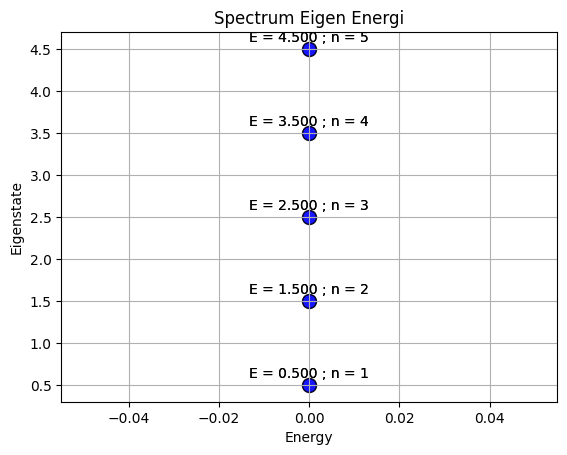

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming eigenState is a function that calculates the eigenstate energy
# and x, ngrid, v, dx are defined before this code.

# Create an array of energy values to calculate the eigenstates for
energy_mm = np.linspace(0, 5, 10)  # emin, emax, dE

# Initialize arrays to store the calculated eigenstate energies and levels
ener_new_arr = []
level_arr = []

# Loop over each energy value and calculate the corresponding eigenstate
for energy in energy_mm:
    output = eigenState(x, ngrid, v, energy, dx)
    ener_new_arr.append(output[0])  # Store the calculated eigenstate energy
    psi = output[1]

    # Calculate the square of the wave function (psi squared)
    psi_squared = np.abs(psi) ** 2

    # Count the number of peaks in the wave function to determine the energy level
    dx = x[1] - x[0]  # Calculate the grid spacing
    d_psi_squared = np.gradient(psi_squared, dx)  # Compute the derivative of psi_squared

    # Find the positions where the derivative changes sign
    peaks_indices = np.where(np.diff(np.sign(d_psi_squared)) < 0)[0] + 1
    level_arr.append(len(peaks_indices))  # Store the calculated energy level

# Set all x_ener values to 0
x_ener = np.zeros(len(energy_mm))

# Plot the energy spectrum
plt.scatter(x_ener, ener_new_arr, s=100, c='blue', alpha=0.7, edgecolors='black')

# Attach each ener_new_arr value for each scatter bubble
for i, energy in enumerate(ener_new_arr):
    plt.annotate(f'E = {energy:.3f} ; n = {level_arr[i]:d}', (x_ener[i], energy), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('Energy')
plt.ylabel('Eigenstate')
plt.title('Spectrum Eigen Energi')
plt.grid(True)
plt.show()


#Example for Kronig Penney Potensial

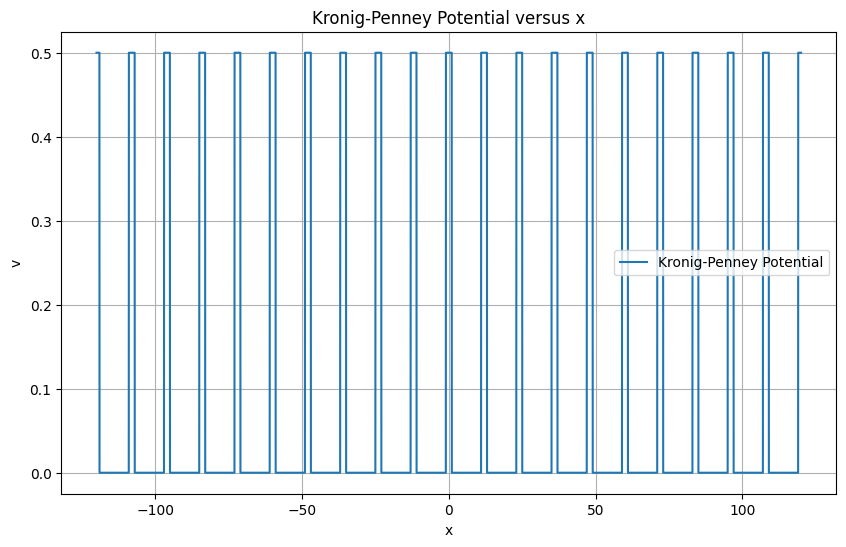

In [5]:
# Import two libraries that help us do math and make graphs
import numpy as np
import matplotlib.pyplot as plt

# Define a function that calculates the Kronig-Penney potential
# The Kronig-Penney potential is a model that describes how electrons behave in a periodic structure
def kronig_penney_potential(x, lks, lpt, v0, vmax):
    # Shift the x values so that the potential wells are centered at zero
    # The potential wells are the regions where the electrons have lower energy
    xp = x - xmin + lpt / 2
    # Check if the x values are inside or outside the potential wells
    # Use the modulo operator (%) to find the remainder of dividing by lks
    # If the remainder is less than lpt, then x is inside the well
    in_well = (xp % lks) < lpt
    # Assign the potential values based on the position of x
    # Use np.where to choose between two values depending on a condition
    # If x is inside the well, use vmax as the potential value
    # If x is outside the well, use v0 as the potential value
    vpot = np.where(in_well, vmax, v0)
    return vpot

# Define some parameters for the Kronig-Penney potential
xmin = -120 # The smallest x value we want to use
xmax = 120 # The largest x value we want to use
dx = 0.01 # The distance between each x value
leb = xmax - xmin # The total length of the box that contains the potential wells
ngrid = int(leb / dx) # The number of x values we need to use

# Create an array for x coordinates
# Use np.linspace to create an array of evenly spaced numbers from xmin to xmax
x = np.linspace(xmin, xmax, ngrid)

# Set some more parameters for the Kronig-Penney potential
lks = 12 # The length of one segment that contains a well and a barrier
lpt = 2 # The length of the potential well
v0 = 0 # The potential value outside the well
vmax = 0.5 # The potential value inside the well
pot_count = leb/lks

# Calculate the Kronig-Penney potential for each x value
# Use the function we defined earlier and pass in the parameters we set
vpot = kronig_penney_potential(x, lks, lpt, v0, vmax)

# Plot the Kronig-Penney potential versus x
# Use matplotlib.pyplot to make a graph of the potential curve
plt.figure(figsize=(10, 6)) # Create a figure with a specified size in inches (width, height)
plt.plot(x, vpot, label='Kronig-Penney Potential') # Plot the x and y values and add a label for the curve
plt.xlabel('x') # Add a label for the horizontal axis
plt.ylabel('v') # Add a label for the vertical axis
plt.title('Kronig-Penney Potential versus x') # Add a title for the graph
plt.legend() # Show the label for the curve in a box called legend
plt.grid(True) # Show some grid lines to make it easier to read the graph
plt.show() # Display the graph on the screen

##show energy spectrum

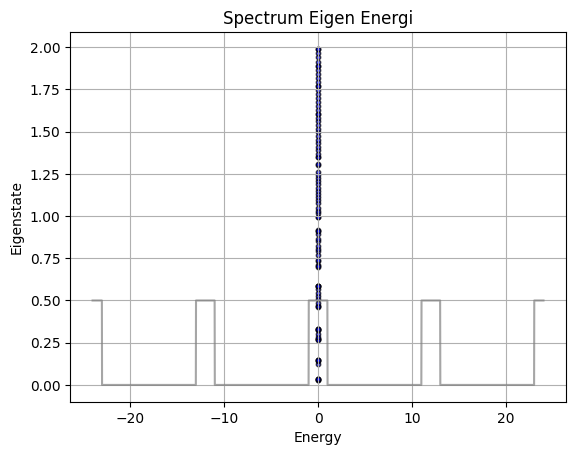

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the Kronig-Penney potential for each x value
# Use the function we defined earlier and pass in the parameters we set
x = np.linspace(xmin, xmax, ngrid)
vpot = kronig_penney_potential(x, lks, lpt, v0, vmax)

# Assuming eigenState is a function that calculates the eigenstate energy
# and x, ngrid, v, dx are defined before this code.

# Create an array of energy values to calculate the eigenstates for
energy_mm = np.linspace(0, 2, 100)  # emin, emax, dE

# Initialize arrays to store the calculated eigenstate energies and levels
ener_new_arr = []
level_arr = []
psi_new_arr = []

# Loop over each energy value and calculate the corresponding eigenstate
for energy in energy_mm:
    output = eigenState(x, ngrid, vpot, energy, dx)
    ener_new_arr.append(output[0])  # Store the calculated eigenstate energy
    psi_new_arr.append(output[1])
    psi = output[1]

    # Calculate the square of the wave function (psi squared)
    psi_squared = np.abs(psi) ** 2

    # Count the number of peaks in the wave function to determine the energy level
    dx = x[1] - x[0]  # Calculate the grid spacing
    d_psi_squared = np.gradient(psi_squared, dx)  # Compute the derivative of psi_squared

    # Find the positions where the derivative changes sign
    peaks_indices = np.where(np.diff(np.sign(d_psi_squared)) < 0)[0] + 1
    level_arr.append(len(peaks_indices))  # Store the calculated energy level

# Set all x_ener values to 0
x_ener = np.zeros(len(energy_mm))

# Modify x to only include values between -lks*2 and lks*2
x_min = -lks*2
x_max = lks*2
x_indices = np.where((x >= x_min) & (x <= x_max))
x = x[x_indices]
psi_squared = psi_squared[x_indices]
psi = psi[x_indices]
vpot = vpot[x_indices]

# Plot the energy spectrum
plt.scatter(x_ener, ener_new_arr, s=10, c='blue', alpha=0.7, edgecolors='black')
plt.plot(x, vpot, label='V(x)', color='gray', alpha=0.7)  # Overlapping vpot

# # Attach each ener_new_arr value for each scatter bubble
# for i, energy in enumerate(ener_new_arr):
#     plt.annotate(f'E = {energy:.3f} ; n = {level_arr[i]:d}', (x_ener[i], energy), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('Energy')
plt.ylabel('Eigenstate')
plt.title('Spectrum Eigen Energi')
plt.grid(True)
plt.show()


##Show eigen function and eigen energy


1.   plot wave function
2.   plot Probability
3.   energy eigen value

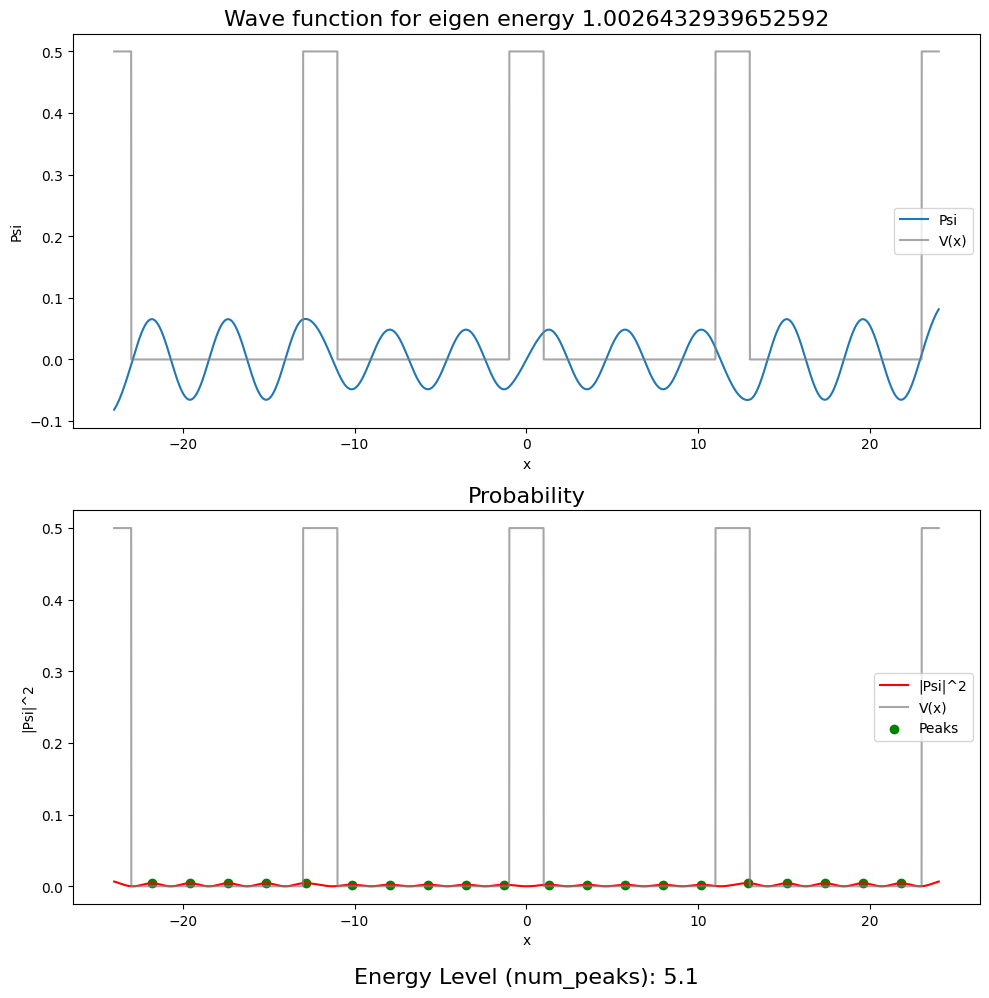

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the Kronig-Penney potential for each x value
# Use the function we defined earlier and pass in the parameters we set
x = np.linspace(xmin, xmax, ngrid)
vpot = kronig_penney_potential(x, lks, lpt, v0, vmax)

# Assuming eigenState is a function that calculates the eigenstate energy
# and x, ngrid, v, dx are defined before this code.
# change initE to show different energy levels (initE = 0 is for energy level 1)

initE = 1
output = eigenState(x, ngrid, vpot, initE, dx)
energy = output[0]
psi = output[1]

# Calculate the square of the wave function (psi squared)
psi_squared = np.abs(psi) ** 2

# Count peaks using differentiation
dx = x[1] - x[0]  # Calculate the grid spacing
d_psi_squared = np.gradient(psi_squared, dx)  # Compute the derivative of psi_squared

# Find the positions where the derivative changes sign
peaks_indices = np.where(np.diff(np.sign(d_psi_squared)) < 0)[0] + 1
num_peaks = len(peaks_indices) / pot_count

# Modify x to only include values between -lks*2 and lks*2
x_min = -lks*2
x_max = lks*2
x_indices = np.where((x >= x_min) & (x <= x_max))
x = x[x_indices]
psi_squared = psi_squared[x_indices]
psi = psi[x_indices]
vpot = vpot[x_indices]

# Plot the psi versus x
plt.figure(figsize=(10, 10))  # Create a figure with size 10x10 inches

# Plot vpot overlapping with psi
plt.subplot(2, 1, 1)
plt.plot(x, psi, label='Psi')
plt.plot(x, vpot, label='V(x)', color='gray', alpha=0.7)  # Overlapping vpot with psi
plt.xlabel('x')
plt.ylabel('Psi')
plt.title('Wave function for eigen energy {}'.format(energy), fontsize=16)
plt.legend()

# Plot psi squared (probability) with vpot
plt.subplot(2, 1, 2)
plt.plot(x, psi_squared, label='|Psi|^2', color='red')
plt.plot(x, vpot, label='V(x)', color='gray', alpha=0.7)  # Overlapping vpot
plt.xlabel('x')
plt.ylabel('|Psi|^2')
plt.title('Probability', fontsize=16)
plt.legend()


# Mark the peaks on the plot
# Count peaks using differentiation
dx = x[1] - x[0]  # Calculate the grid spacing
d_psi_squared = np.gradient(psi_squared, dx)  # Compute the derivative of psi_squared

# Find the positions where the derivative changes sign
peaks_indices = np.where(np.diff(np.sign(d_psi_squared)) < 0)[0] + 1
plt.subplot(2, 1, 2)
plt.scatter(x[peaks_indices], psi_squared[peaks_indices], color='green', label='Peaks')
plt.legend()

# Show the energy level (num_peaks) as text below the plot
plt.text(0.5, -0.2, f'Energy Level (num_peaks): {num_peaks}', transform=plt.gca().transAxes, ha='center', fontsize=16)

plt.tight_layout()  # Adjust the layout for better spacing between subplots
plt.show()
